# PCA-beginner-s-guide-to-dimensionality-reduction

* [Dimensionality Reduction](#Dimensionality Reduction)
    - [Main Approaches for Dimensionality Reduction](#Main Approaches for Dimensionality Reduction)
        - [Projection](#Projection) 
             - [PCA - Principal Component Analysis](#PCA - Principal Component Analysis) 
                  - [PCA for Data Visualization and Dimentionality Reduction](#PCA for Data Visualization and Dimentionality Reduction)
                      - [Standardization](#Standardization) 
                      - [Eigendecomposition - Computing Eigenvectors and Eigenvalues](#Eigendecomposition)
                      - [Selecting Principal Components ](#Selecting Principal Components )
                      - [Projection Onto the New Feature Space ](#Projection Onto the New Feature Space )
                  - [PCA to Speed-up Machine Learning Algorithms](#PCA to Speed-up Machine Learning Algorithms)
                  - [Incremental PCA](#Incremental PCA)
        - [Manifold Learning](#Manifold Learning)  
            - [t-SNE](#t-SNE)
            - [Kernel PCA](#Kernel PCA)
            - [LLE](#LLE)
            - [Isomap](#Isomap)

<a id="Dimensionality Reduction"></a>
# <u>Dimensionality Reduction</u>

Dimensionality reduction is the process of reducing the dimension of the feature set while maintaining its structure and usefulness.

## <u>Reasons for dimentionality reduction</u>

- Most points in a high-dimensional hypercube are very close to the border and at the risk of being very sparse, making predictions much less reliable than in lower dimensions.
- Very large number of features for each training instance may make training extremely slow.
- Difficult to visualize dataset containing large number of features.

## <u>Pros</u>

- Less time in training the dataset.
- Easy visualization of the dataset containing 2 or 3 principle features.
- May (May not) result in higher performance.

## <u>Cons</u>

- Loss of information.

Dimensionality reduction can be achieved in the following ways:

- <b> Feature Elimination </b>: We reduce the feature space by eliminating features. This has a disadvantage though, as we gain no information from those features that you have dropped.

- <b> Feature Selection </b>: We apply some statistical tests in order to rank them according to their importance and then select a subset of features for our work. This again suffers from information loss and is less stable as different test gives different importance score to features.

- <b> Feature Extraction </b>: We create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can be divided into linear(PCA, SVD) and non-linear(t-SNE) dimensionality reduction techniques.

<a id="Main Approaches for Dimensionality Reduction"></a>
## <u>Main Approaches for Dimensionality Reduction </u>

### <u> Projection </u>

Projecting high dimensional data on a low dimentional hyperplane, minimizing the variance. (PCA)

### <u>Manifold Learning </u>

In many cases where the subspace may twist and turn(Swiss roll), projection is not the best approach to dimensionality reduction. Manifold Learning techniques measures how each training instance linearly relates to its closest neighbors, then it looks for a low-dimensional representation of the training set where these local relationships are best preserved.


<a id="Projection"></a>
## <u> Projection </u>

<a id="PCA - Principal Component Analysis"></a>
### <u> PCA - Principal Component Analysis (Vanilla PCA) </u>
- Principal components analysis is the main method used for linear dimension reduction.
- It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized, with the maximum variance, maximum information is preserved. In another words, it selects the hyperplane(s) that minimizes the mean squared distance between the original dataset and its projection onto that hyperplane(s).
- The first principle component accounts for the maximum variance in the data and so on ...
- All the components in lower-dimensional space are linearly uncorrelated.
- Each of the new features or components created after PCA are all independent of one another.

<a id="PCA for Data Visualization and Dimentionality Reduction"></a>
### <u>Application 1 : PCA for Data Visualization and Dimentionality Reduction </u>

In [1]:
import pandas as pd
Iris = pd.read_csv("Data_set/Iris.csv")
X = Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=Iris.Species

<a id="Standardization"></a>
### <u>Step 1:  Standardization</u>

Un-standardized data is sensitive to the variances of the initial variables. The variables with larger ranges dominates over those with small ranges (a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which leads to biased results. Transforming the data to comparable scales prevents this problem.

Mathematically, this can be done by subtracting the mean (or emperical mean - sample mean of each column shifted to zero) and dividing by the standard deviation for each value of each variable.

In [2]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

<a id="Eigendecomposition"></a>
### <u>Step 2:  Eigendecomposition - Computing Eigenvectors and Eigenvalues</u>

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

#### <u> Covariance Matrix </u>

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix , which is a matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$$Cov(𝑋, 𝑌 ) = \frac{\sum(x_i - \bar{x}) (y_i - \bar{y})}{N-1}$$

In [3]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Next, we perform an eigendecomposition on the covariance matrix:

All the three approaches yield the same eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

In [4]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


#### <u> Singular Value Decomposition </u>

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [5]:
u,s,v = np.linalg.svd(X.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

<a id="Selecting Principal Components"></a>
### <u>Step 3:  Selecting Principal Components</u>

#### <u>Sorting Eigenpairs </u>
The goal of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they all have the same unit length 1.

In order to decide which eigenvector(s) can be dropped without losing too much information, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

The common approach is to rank the eigenvalues from highest to lowest.

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173413
0.14834222648164005
0.020746013995596377


#### <u> Explained Variance </u>
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [7]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In the above array we see that the first feature explains roughly 72.77% of the variance within our data set while the first two explain 95.8 and so on. 

#### <u>Projection Matrix </u>
The projection matrix is used to transform the Input data(X) onto the new feature subspace. Projection Matrix is a matrix of concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our 2-dimensional eigenvector matrix .

In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


<a id="Projection Onto the New Feature Space"></a>
### <u>Step 4:  Projection Onto the New Feature Space</u>

In [9]:
Y = X.dot(matrix_w)

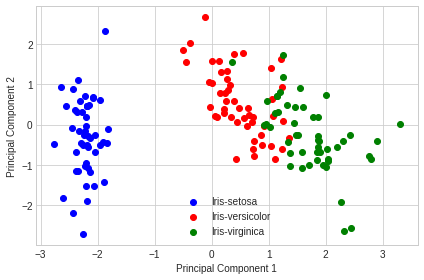

In [10]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### <u>Shortcut - PCA in scikit-learn</u>


In [11]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

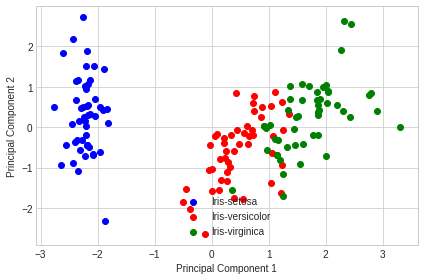

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

<a id="PCA to Speed-up Machine Learning Algorithms"></a>

### <u>Application 2 - PCA to Speed-up Machine Learning Algorithms </u>

The MNIST database of handwritten digits has 784 feature columns/ dimensions, a training set of 60,000 examples, and a test set of 10,000 examples.

In [13]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [14]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( X, y, test_size=0.15, random_state=0)

In [15]:
from sklearn.decomposition import PCA

# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
pca.fit(train_img)
print(pca.n_components_)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

154


Time stats

The table below shows how long it took to fit logistic regression on kaggle kernel after using PCA (retaining different amounts of variance each time).

| Variance Retained | Number of Components | Time (Seconds) | Accuracy
| --- | --- | --- | --- |
| Without PCA | -- |153 | 0.9096 |
| 0.99 | 331 | 75 |0.7789
| 0.95 |154 | 55 |0.9050
| 0.90 |87 | 28 |0.9030
| 0.85 |59 | 20 |0.897

<a id="Incremental PCA"></a>
### <u> Incremental PCA </u>

PCA requires the whole training set to fit in memory. Incremental PCA splits the training set into mini-batches. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [16]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(train_img, n_batches):
        inc_pca.partial_fit(X_batch)
        
X_mnist_reduced = inc_pca.transform(train_img)

<a id="Manifold Learning"></a>
## <u> Manifold Learning </u>

<a id="t-SNE"></a>
### <u> t-SNE </u>

- t-SNE map points in high dimensional space to a lower dimension so that the distances between the points remains almost the same.

- t-SNE, unlike PCA, is not a linear projection. It uses the local relationships between points to create a low-dimensional mapping. This allows it to capture non-linear structure.
- t-SNE creates a probability distribution using the Gaussian distribution that defines the relationships between the points in high-dimensional space.
- t-SNE uses the Student t-distribution to recreate the probability distribution in low-dimensional space.
- t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. This fact has an important consequence: t-SNE is non-deterministic. While running it multiple times, we may get different results each time.

t-SNE uses “stochastic neighbors” which means that there is no clear line between which points are neighbors of the other points. This lack of clear borders allows t-SNE to naturally take both global and local structure into account. Local structure is more important than global structure, but points that are far away are not completely ignored, allowing for a “well-balanced” dimensionality reduction.

#### <u>t-SNE Algorithm </u>:

<b>Step 1 </b> : In the high-dimensional space, create a probability distribution that dictates the relationships between various neighboring points

<b>Step 2 </b>: It then tries to recreate a low dimensional space that follows that probability distribution as best as possible.

#### <u> Why do we need t-SNE? </u>

PCA can’t capture non-linear dependencies. For instance, PCA would not be able to “unroll” the following structure.

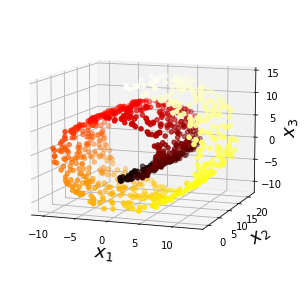

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

A linear projection is like casting a shadow. Unlike PCA, t-SNE is not limited to linear projections, which makes it suited to all sorts of datasets.

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.963165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.412735
[t-SNE] KL divergence after 300 iterations: 0.592721


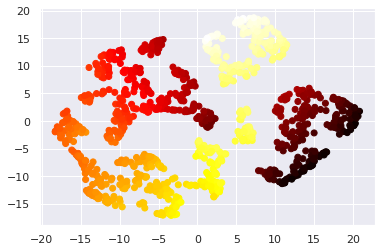

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="Kernel PCA"></a>
### <u>  Kernel PCA </u>

Kernel PCA can perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

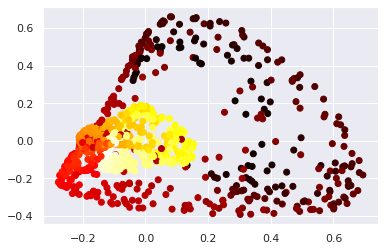

In [20]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

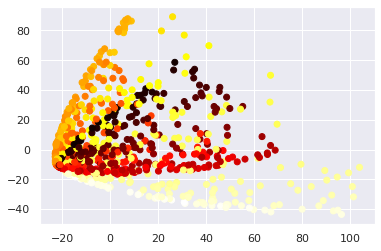

In [21]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="poly", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="LLE"></a>
### <u> LLE </u>

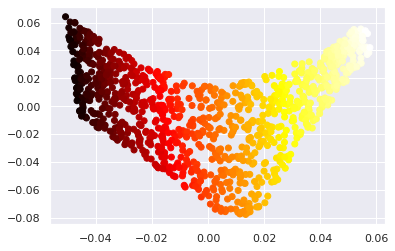

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="Isomap"></a>
### <u> Isomap </u>

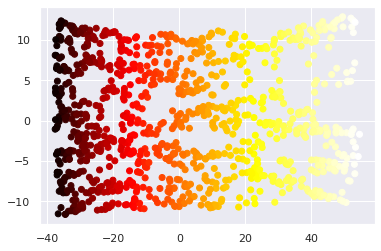

In [23]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)